In [1]:
# 1. Imports & Setup
import sys
sys.path.append('../')

from src.data.loader import get_equity_data
from src.features.signals import add_rsi, add_sma, add_momentum, add_macd
from src.backtest.simple_backtester import simple_strategy_signals, backtest_returns
from src.viz.plotting import plot_cumulative_returns, plot_signal_distribution, plot_signal_correlation

import pandas as pd

In [2]:
# 2. Data Ingestion + Signal Engineering
df = get_equity_data("AAPL", period="1y")

if isinstance(df.columns, pd.MultiIndex):
    df.columns = [col[0].lower() if col[0] != 'Date' else 'date' for col in df.columns]
else:
    df.columns = [col.lower() for col in df.columns]

df = add_rsi(df, 14)
df = add_sma(df, 20)
df = add_momentum(df, 10)
df = add_macd(df)

df['returns'] = df['close'].pct_change()
signal_cols = ['rsi_14', 'sma_20', 'momentum_10', 'macd']

/Users/jamespecore/Documents/Github/data_engineering_portfolio_2025/ai-financial-signals-pipeline/notebooks/../src/data/loader.py:37: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval, progress=False)


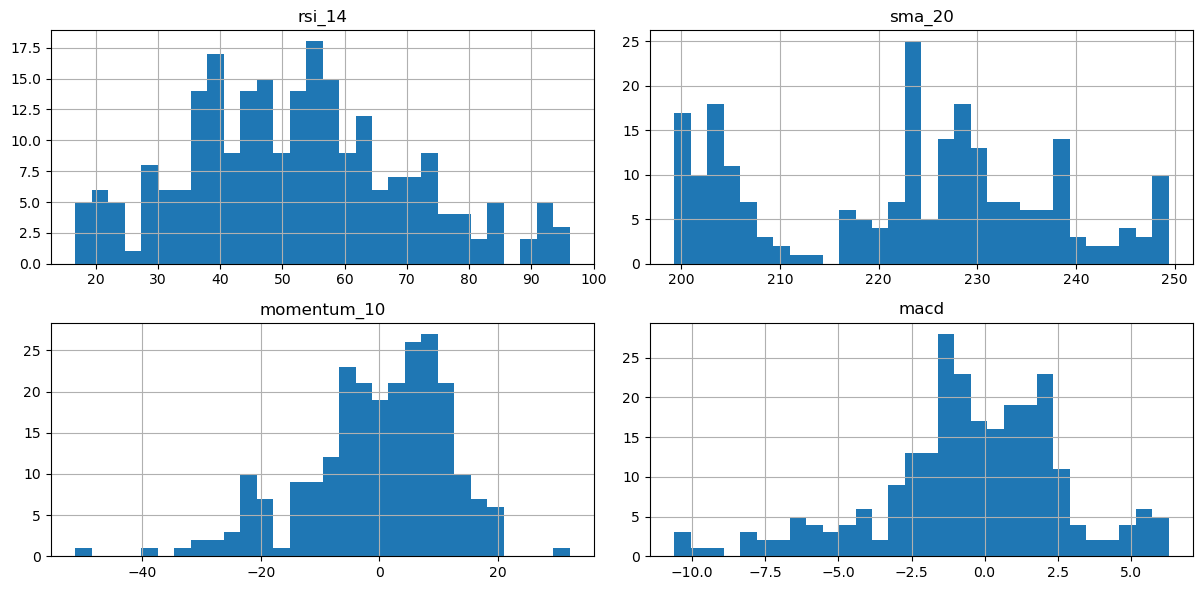

In [3]:
# 3. Plot Signal Distribution
plot_signal_distribution(df, signal_cols)

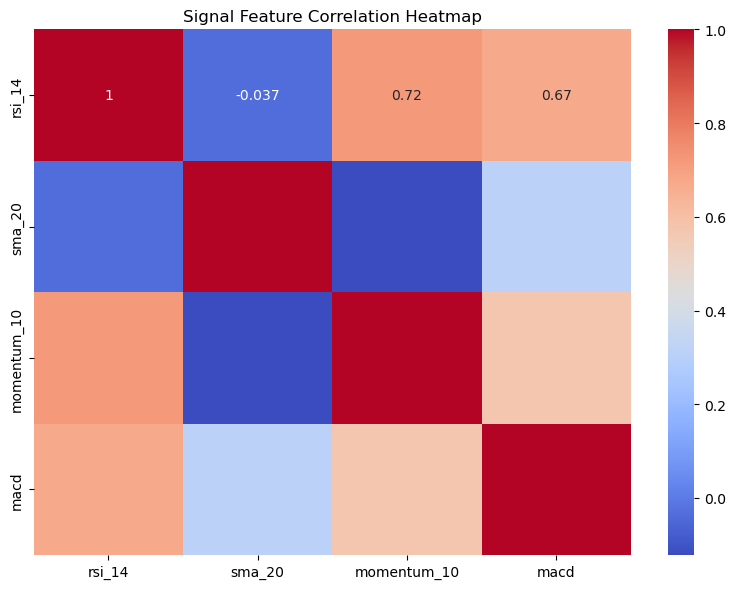

In [4]:
# 4. Plot Signal Correlation Heatmap
plot_signal_correlation(df, signal_cols)

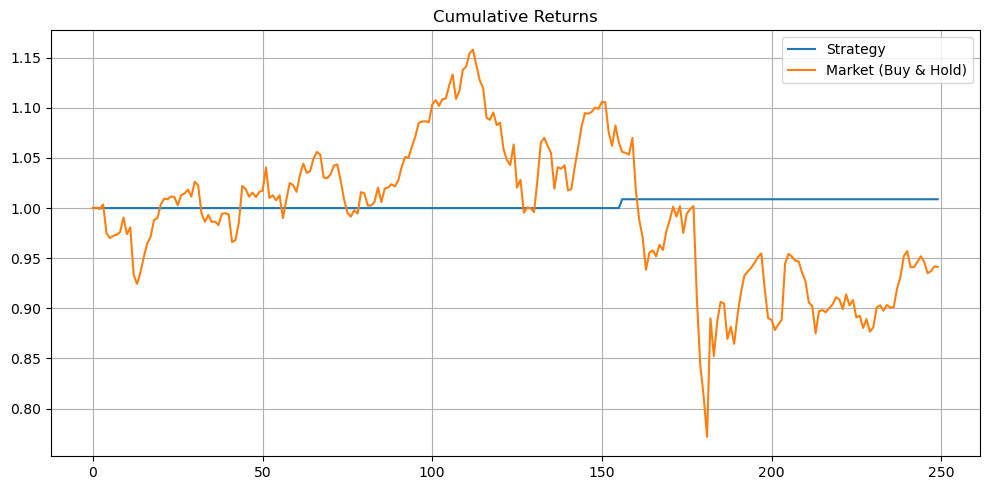

In [5]:
# 5. Strategy + Market Cumulative Returns
df = simple_strategy_signals(df, rsi_low=40, rsi_high=60, sma_window=20)
df = backtest_returns(df)

plot_cumulative_returns(df)